In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import os
import glob
%matplotlib inline

In [2]:
Path="/media/ilker/Ilker/CRAB/07_20_2022/S1_counts/*.txt"
files = glob.glob(Path,recursive=True)

In [3]:
def getValues(files,weight):
    values={"S1_PHOTOCATHODE":np.array([]),"S2_PHOTOCATHODE":np.array([])}
    for i in files:
        count=0
        with open(i) as f:
            next(f)
            lines=f.readlines()
            for line in lines:
                splitline=line.split(",")
                values[splitline[0]]=np.append(values[splitline[0]],round(int(splitline[1])/weight))
        f.close()
        
    return values

def Histogram(data,xlabel,ylabel,title,figsize=(12,8),dpi=300,bins=3):
    plt.figure(figsize=figsize,dpi=dpi)
    plt.hist(data,bins=bins)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()

        

In [4]:
S1=getValues(files,1)


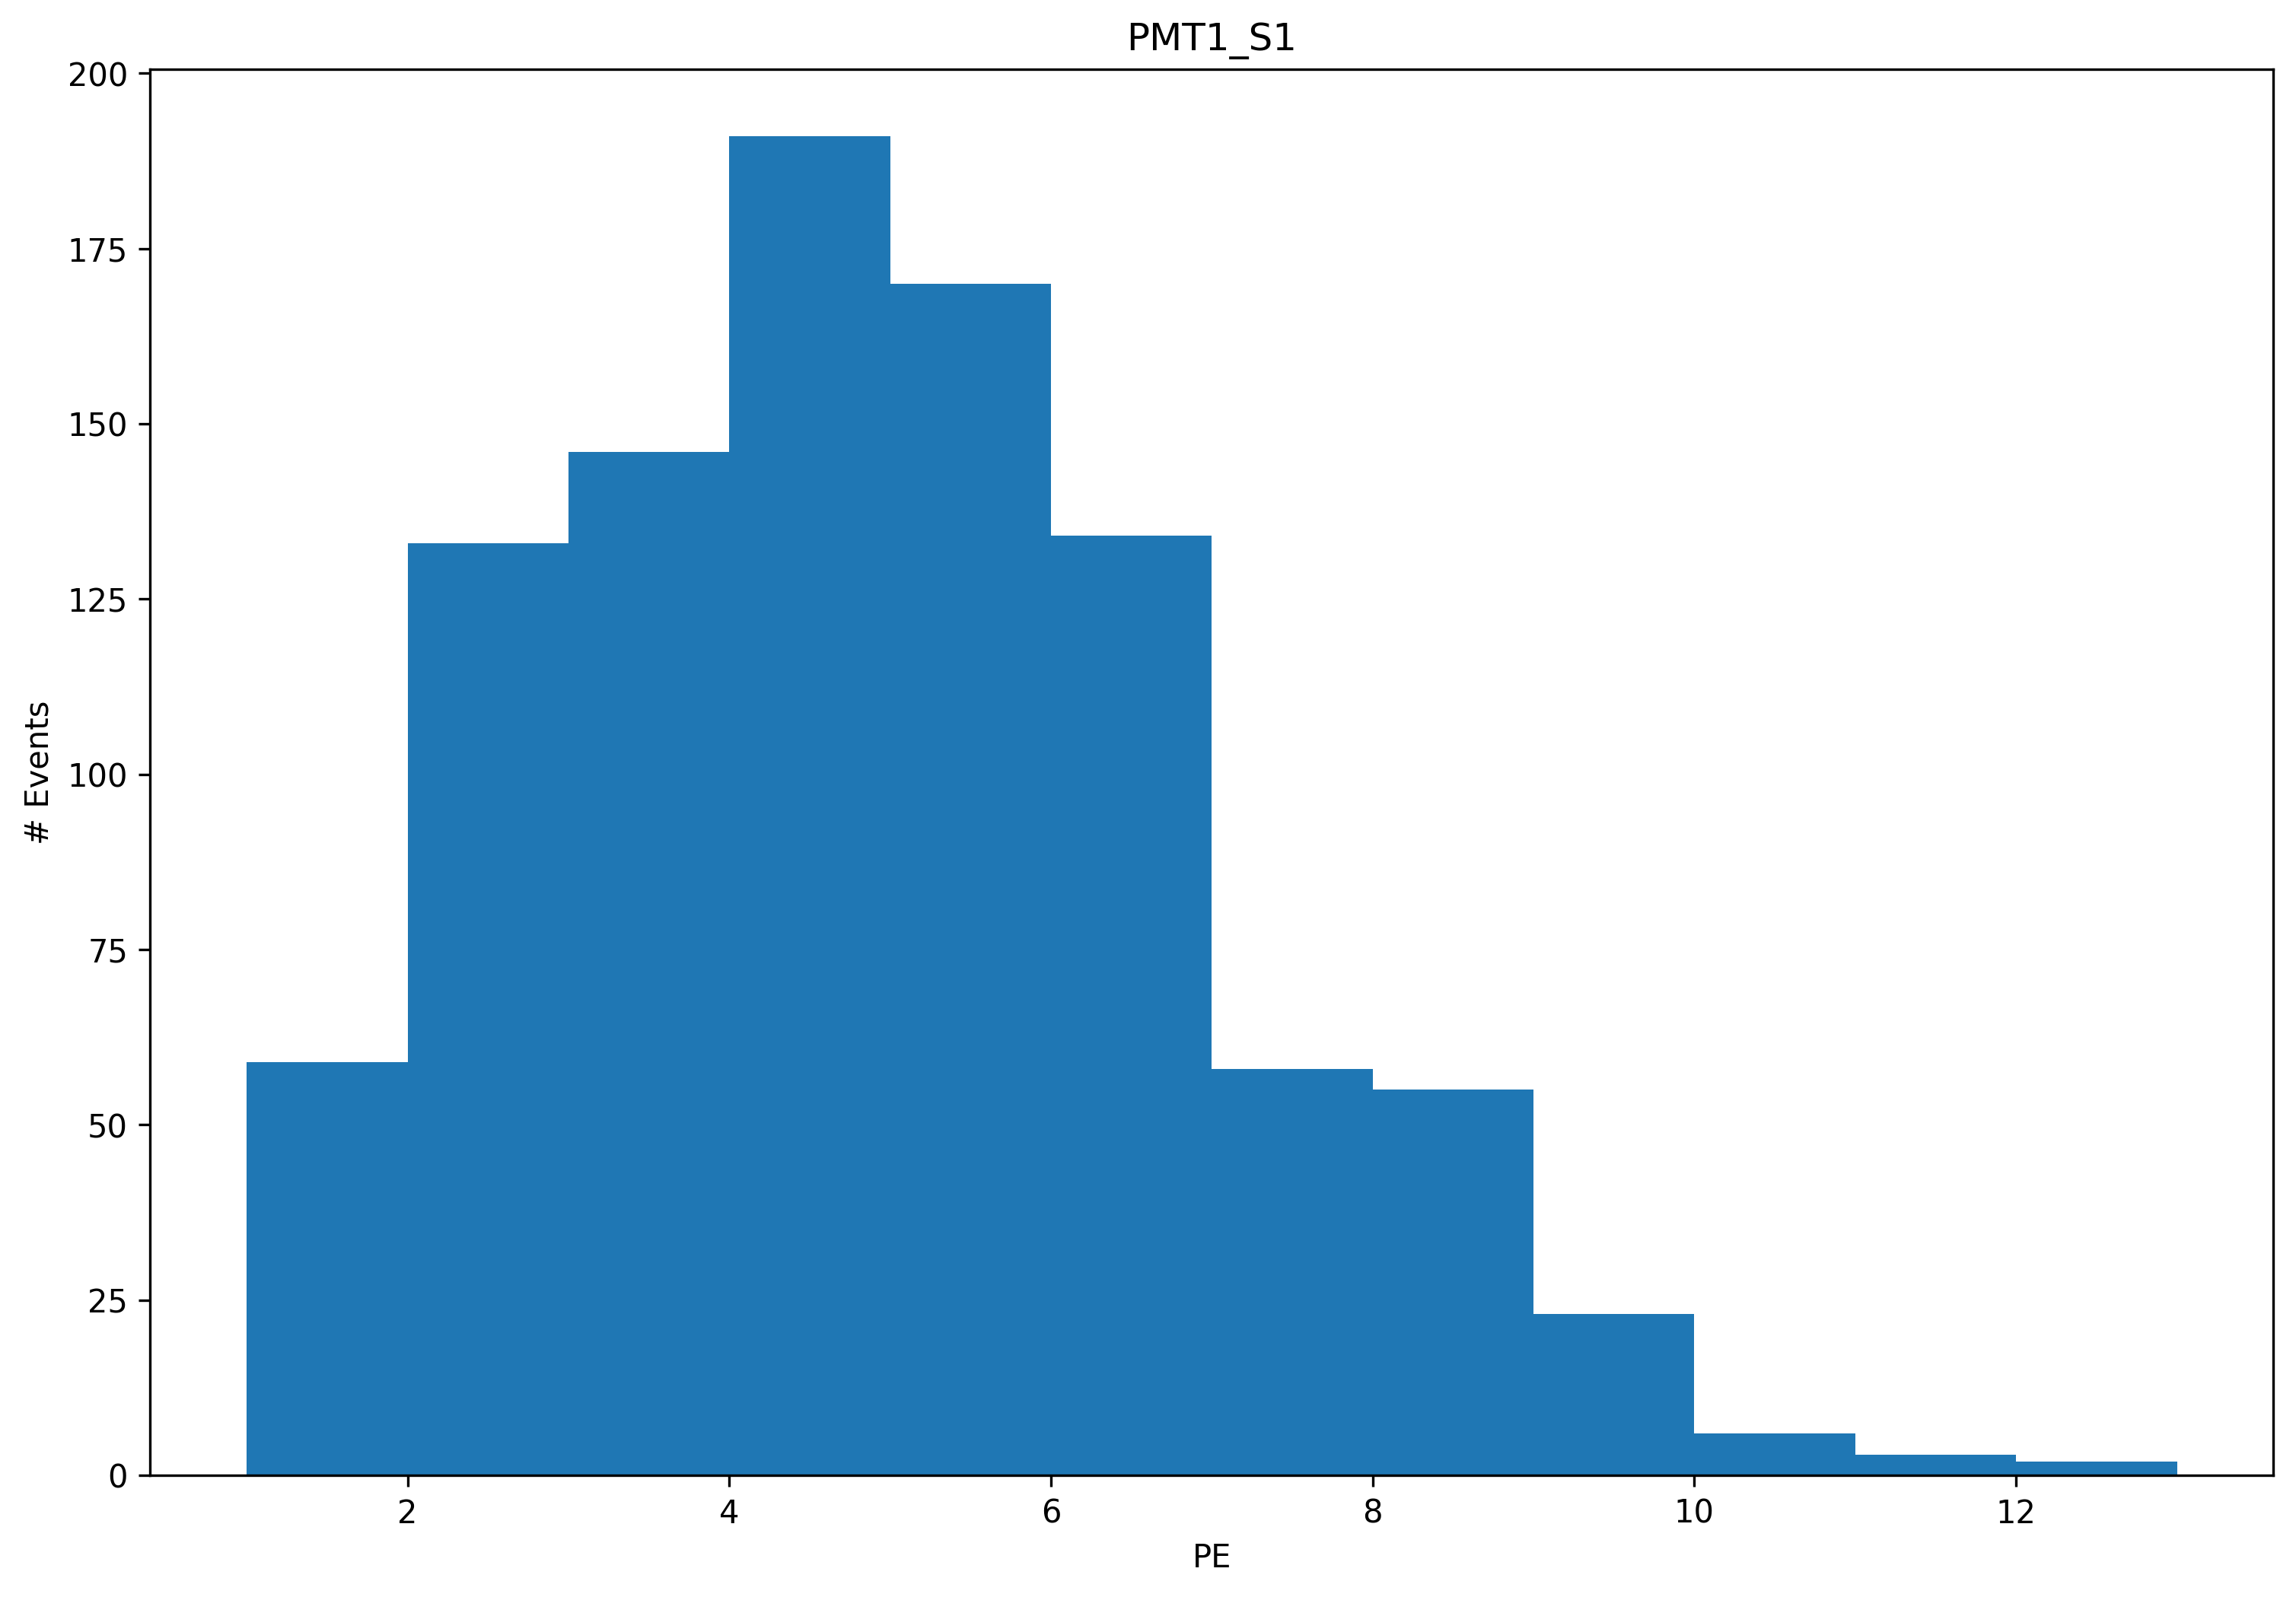

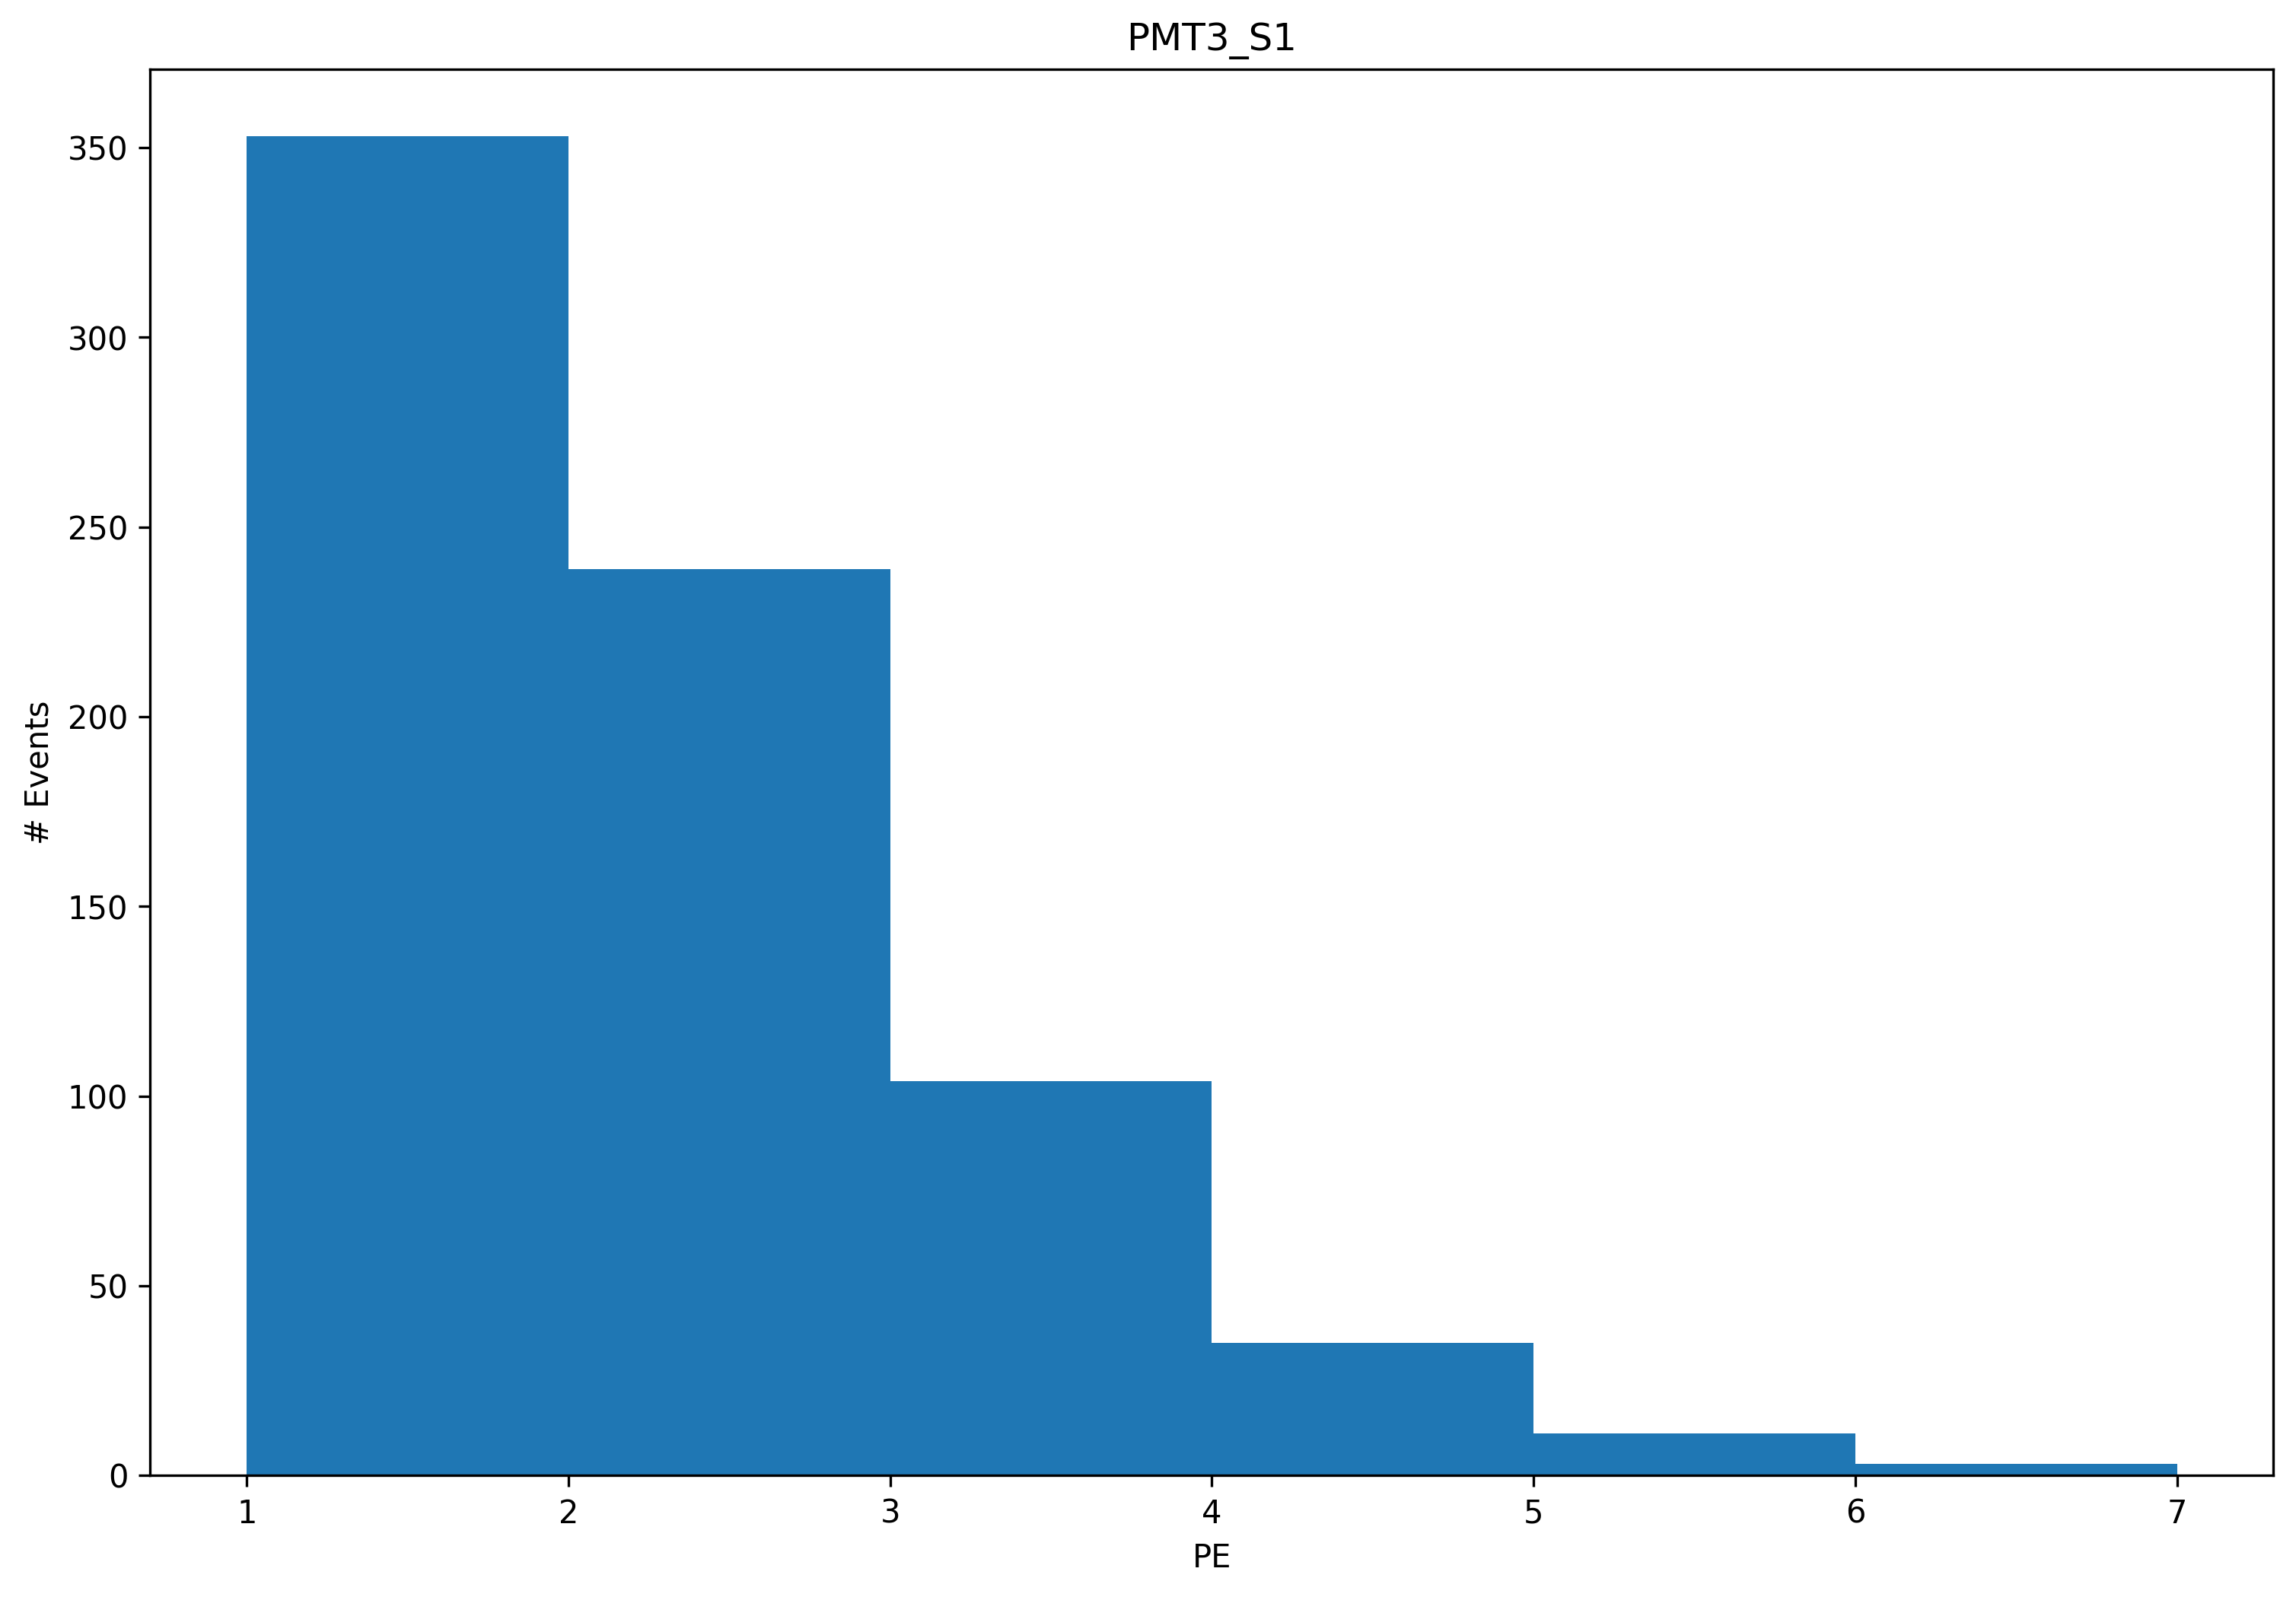

In [5]:

Histogram(S1["S2_PHOTOCATHODE"],"PE","# Events","PMT1_S1",bins=12)
Histogram(S1["S1_PHOTOCATHODE"],"PE","# Events","PMT3_S1",bins=6)

In [6]:
PMT1_S1_mean=st.mean(S1["S2_PHOTOCATHODE"])
PMT3_S1_mean=st.mean(S1["S1_PHOTOCATHODE"])
Path="/media/ilker/Ilker/CRAB/07_20_2022/S2_counts/*.txt"
S2files = glob.glob(Path,recursive=True)
S2=getValues(S2files,1)


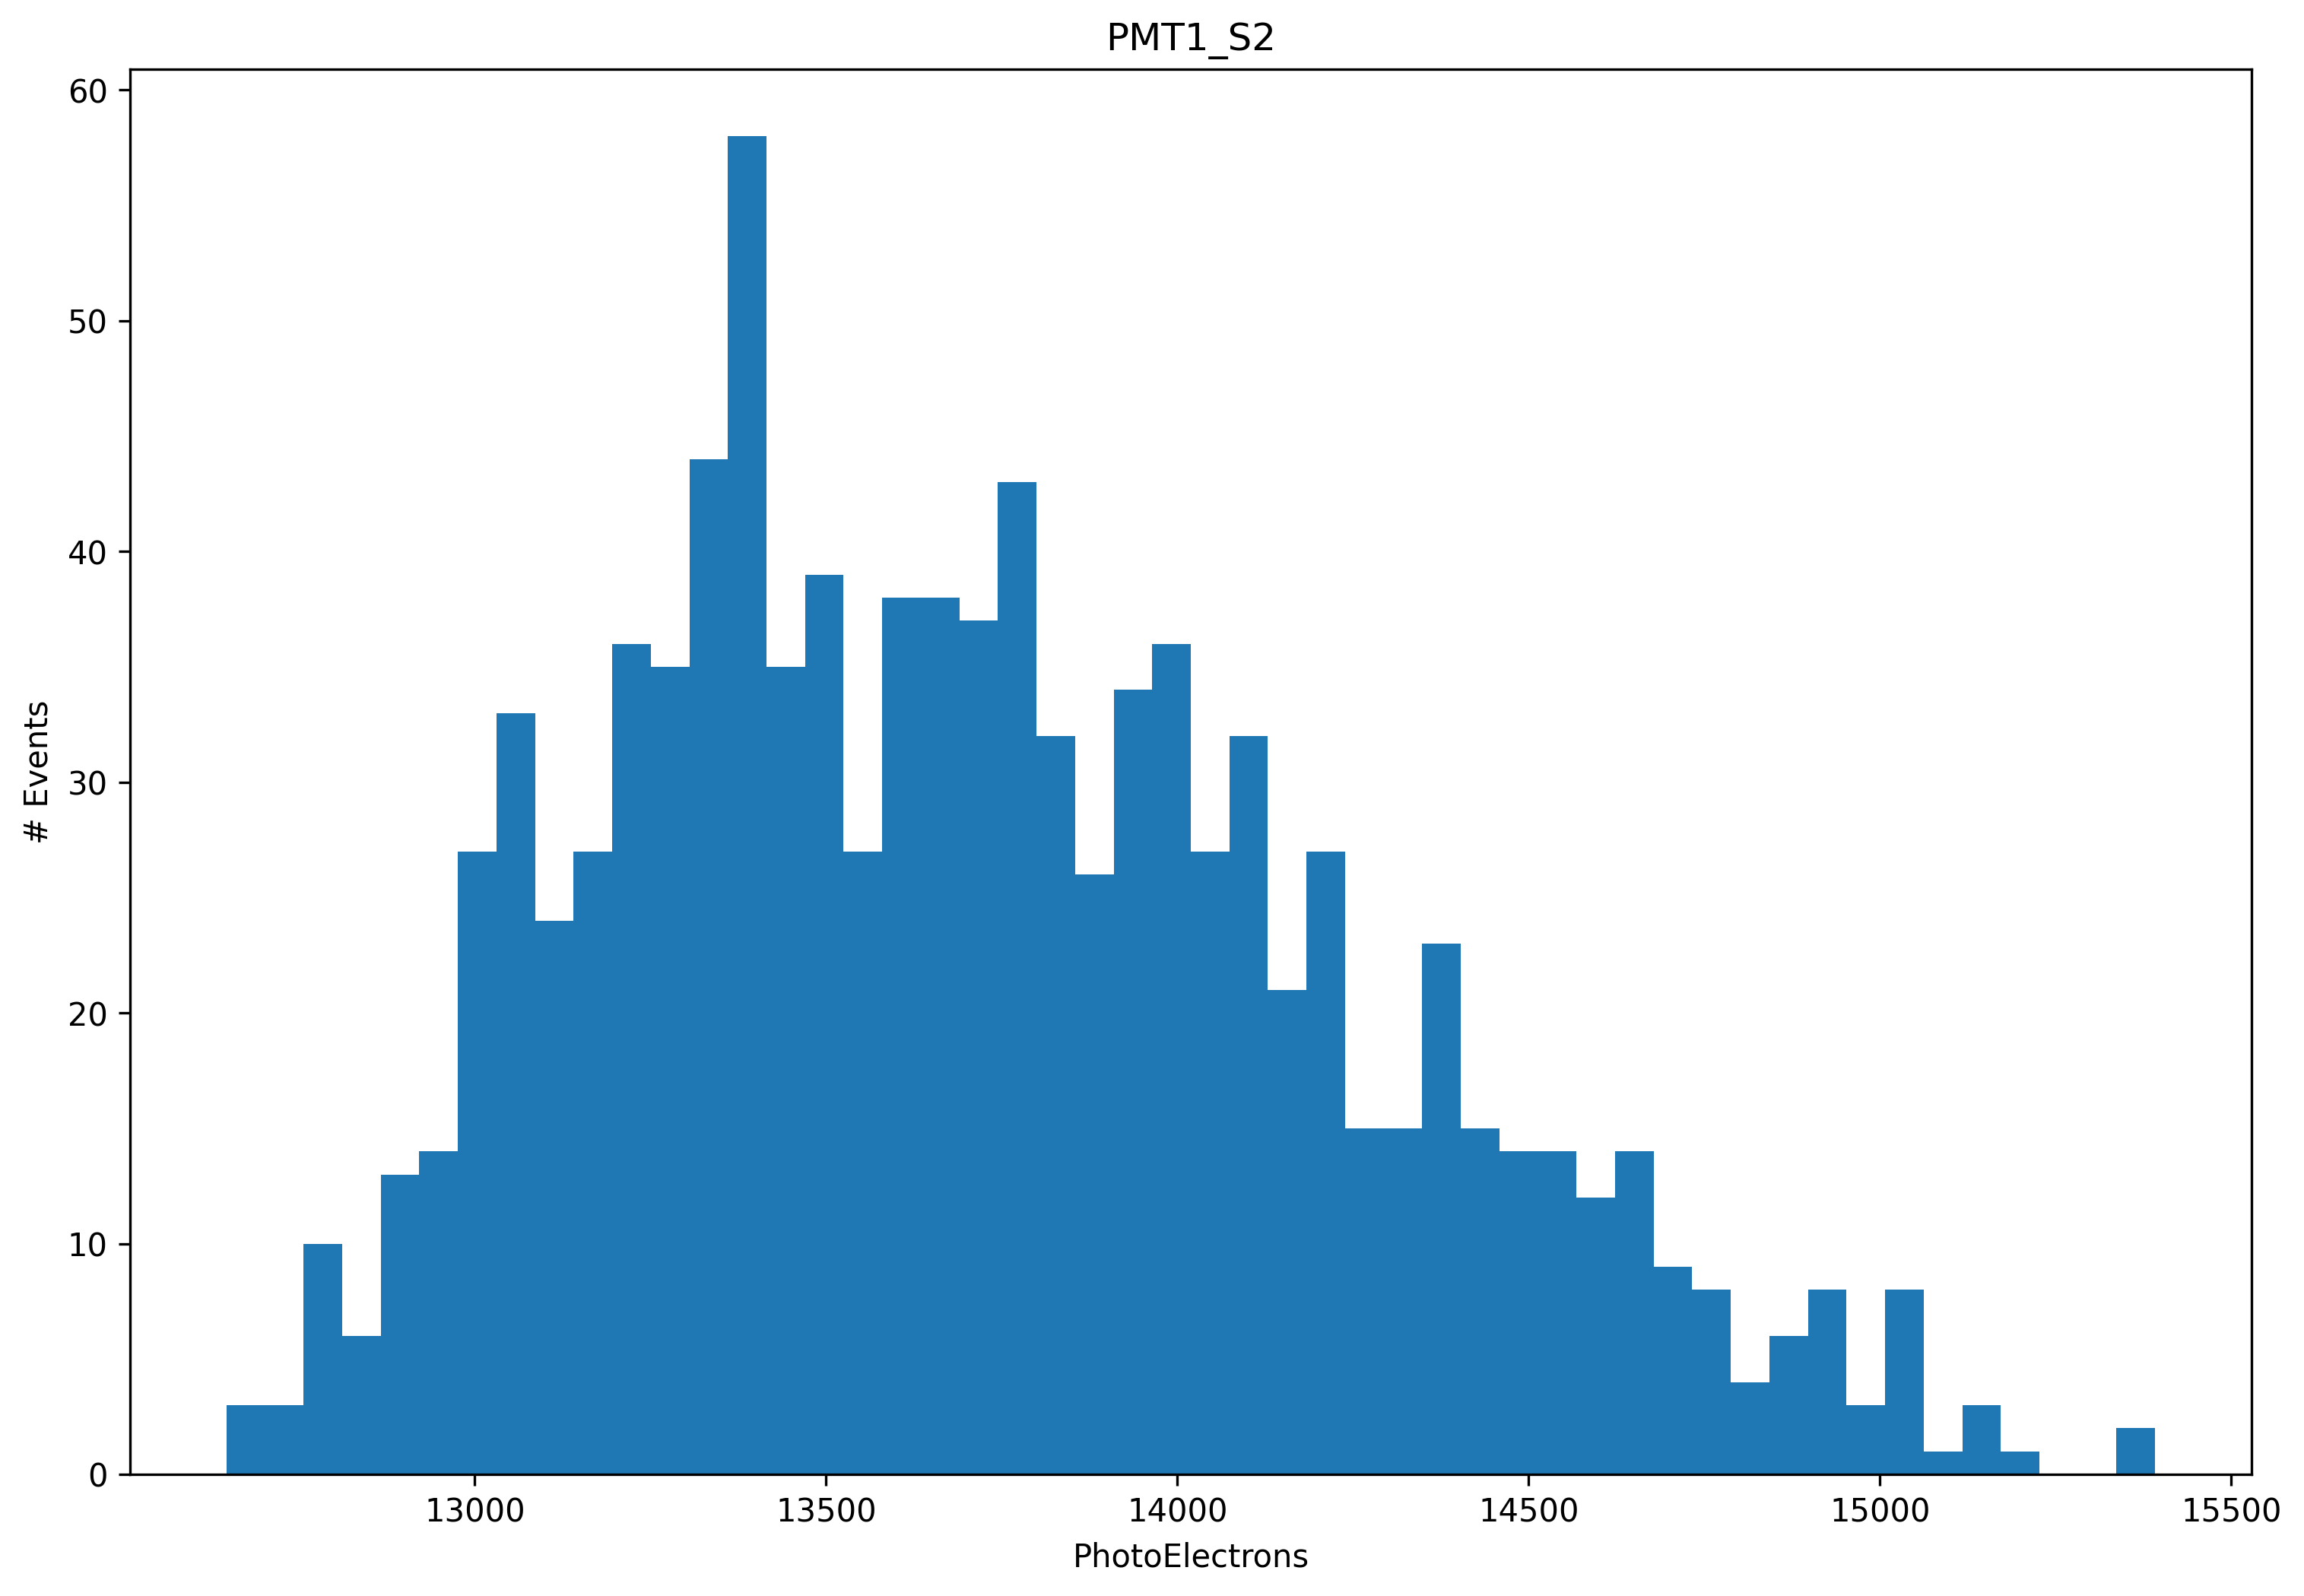

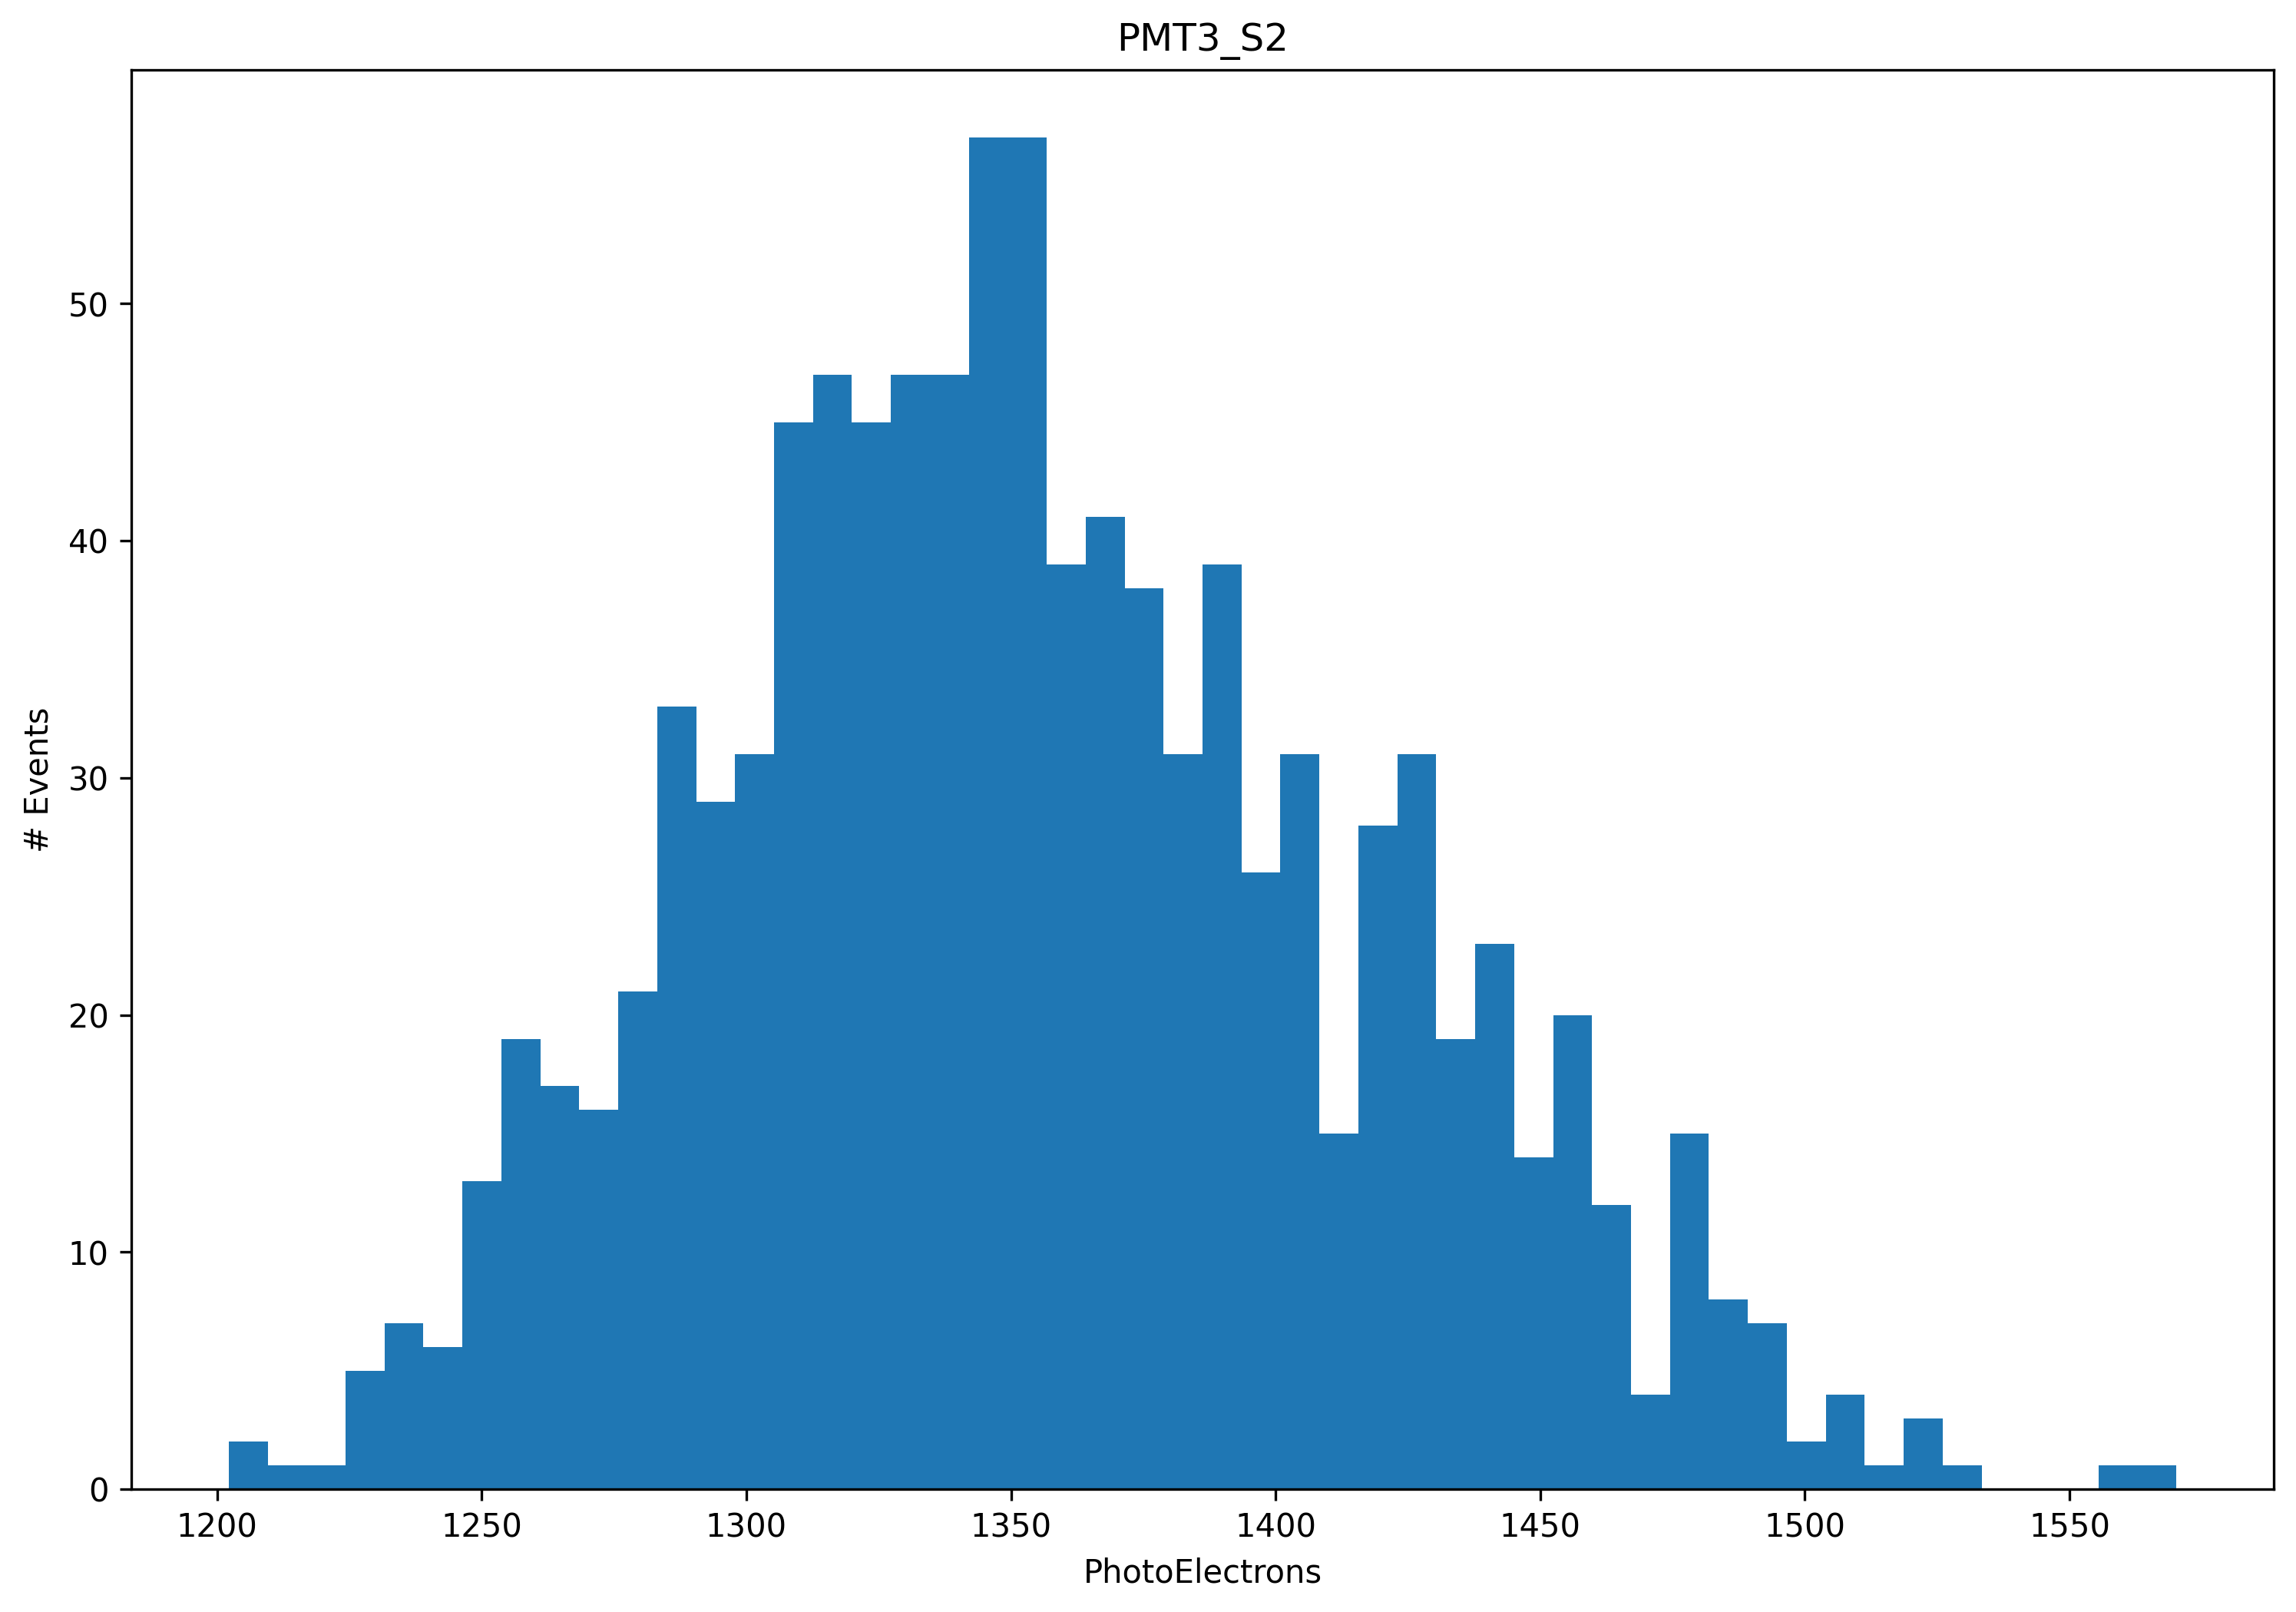

In [7]:
S2["S2_PHOTOCATHODE"]=S2["S2_PHOTOCATHODE"]-PMT1_S1_mean
S2["S1_PHOTOCATHODE"]=S2["S1_PHOTOCATHODE"]-PMT3_S1_mean

Histogram(S2["S2_PHOTOCATHODE"],"PhotoElectrons","# Events","PMT1_S2",bins=50)
Histogram(S2["S1_PHOTOCATHODE"],"PhotoElectrons","# Events","PMT3_S2",bins=50)


In [8]:

print("#### S2 Info ####")
mean=st.mean(S2["S1_PHOTOCATHODE"])
stdev=st.stdev(S2["S1_PHOTOCATHODE"])
print(f"mean = {mean} stdev = {stdev}")
mean=st.mean(S2["S2_PHOTOCATHODE"])
stdev=st.stdev(S2["S2_PHOTOCATHODE"])
print(f"mean = {mean} stdev={stdev}")

print("#### S1 Info ####")
mean=st.mean(S1["S1_PHOTOCATHODE"])
stdev=st.stdev(S1["S1_PHOTOCATHODE"])
print(f"mean = {mean} stdev = {stdev}")
mean=st.mean(S1["S2_PHOTOCATHODE"])
stdev=st.stdev(S1["S2_PHOTOCATHODE"])
print(f"mean = {mean} stdev={stdev}")

#### S2 Info ####
mean = 1356.9435234899329 stdev = 61.95873352207629
mean = 13730.65818367347 stdev=531.4651921334543
#### S1 Info ####
mean = 1.8214765100671142 stdev = 0.990042070246902
mean = 4.440816326530612 stdev=2.0736114634785463


In [9]:
####################### For S2 Signals #################################################
_01ms_Files = glob.glob("/media/ilker/Ilker/CRAB/Simulation/simdata/01ms/counts/*.txt",recursive=True)
_01ms_values=getValues(_01ms_Files,1)
_015ms_Files = glob.glob("/media/ilker/Ilker/CRAB/Simulation/simdata/015ms/counts/*.txt",recursive=True)
_015ms_values=getValues(_015ms_Files,1)
_02ms_Files = glob.glob("/media/ilker/Ilker/CRAB/Simulation/simdata/02ms/counts/*.txt",recursive=True)
_02ms_values=getValues(_02ms_Files,1)
_04ms_Files = glob.glob("/media/ilker/Ilker/CRAB/Simulation/simdata/04ms/counts/*.txt",recursive=True)
_04ms_values=getValues(_04ms_Files,1)
_06ms_Files = glob.glob("/media/ilker/Ilker/CRAB/Simulation/simdata/06ms/counts/*.txt",recursive=True)
_06ms_values=getValues(_06ms_Files,1)
_1ms_Files = glob.glob("/media/ilker/Ilker/CRAB/Simulation/simdata/1ms/counts/*.txt",recursive=True)
_1ms_values=getValues(_1ms_Files,1)
_10ms_Files = glob.glob("/media/ilker/Ilker/CRAB/Simulation/simdata/10ms/counts/*.txt",recursive=True)
_10ms_values=getValues(_10ms_Files,1)
_100ms_Files = glob.glob("/media/ilker/Ilker/CRAB/Simulation/simdata/100ms/counts/*.txt",recursive=True)
_100ms_values=getValues(_100ms_Files,1)
_1000ms_Files = glob.glob("/media/ilker/Ilker/CRAB/Simulation/simdata/1000ms/counts/*.txt",recursive=True)
_1000ms_values=getValues(_1000ms_Files,1)

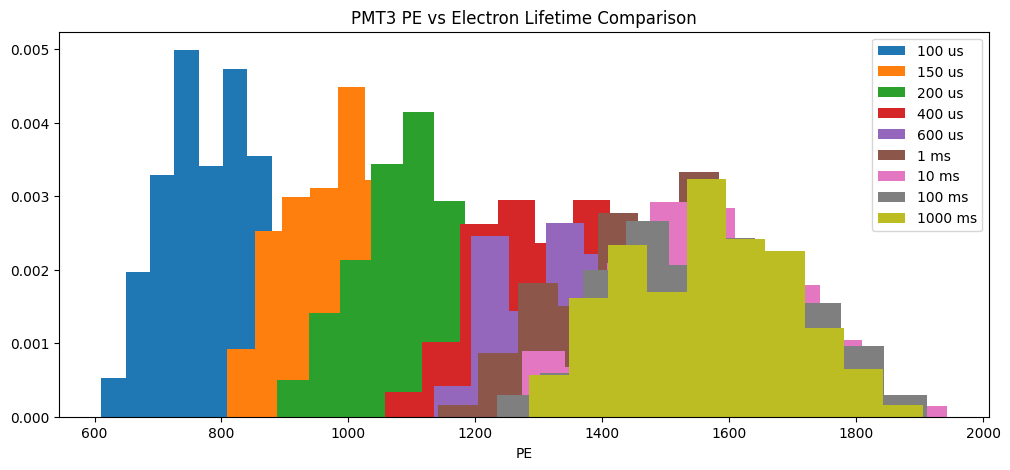

In [18]:
plt.figure(figsize=(12,5))
plt.title("PMT3 PE vs Electron Lifetime Comparison")
binss=10
plt.hist(_01ms_values["S1_PHOTOCATHODE"],bins=binss ,density=True,stacked=True,label="100 us")
plt.hist(_015ms_values["S1_PHOTOCATHODE"],bins=binss ,density=True,stacked=True,label="150 us")
plt.hist(_02ms_values["S1_PHOTOCATHODE"],bins=binss ,density=True,stacked=True,label="200 us")
plt.hist(_04ms_values["S1_PHOTOCATHODE"],bins=binss ,density=True,stacked=True,label="400 us")
plt.hist(_06ms_values["S1_PHOTOCATHODE"],bins=binss ,density=True,stacked=True,label="600 us")
plt.hist(_1ms_values["S1_PHOTOCATHODE"],bins=binss ,density=True,stacked=True,label="1 ms")
plt.hist(_10ms_values["S1_PHOTOCATHODE"],bins=binss,density=True,stacked=True,label="10 ms")
plt.hist(_100ms_values["S1_PHOTOCATHODE"],bins=binss,density=True,stacked=True,label="100 ms")
plt.hist(_1000ms_values["S1_PHOTOCATHODE"],bins=binss,density=True,stacked=True,label="1000 ms")
plt.xlabel("PE")

plt.legend()
plt.show()


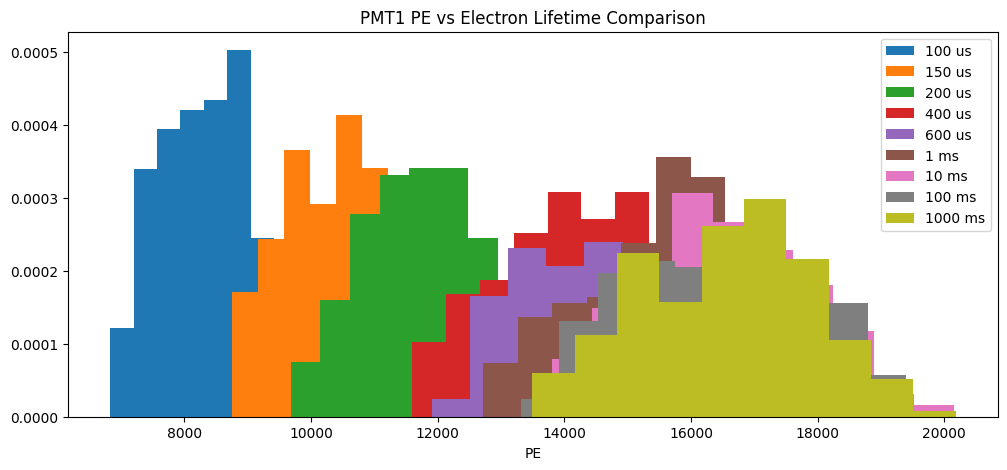

In [17]:
plt.figure(figsize=(12,5))
plt.title("PMT1 PE vs Electron Lifetime Comparison")
binss2=10
plt.hist(_01ms_values["S2_PHOTOCATHODE"],bins=binss2 ,density=True,stacked=True,label="100 us")
plt.hist(_015ms_values["S2_PHOTOCATHODE"],bins=binss2 ,density=True,stacked=True,label="150 us")
plt.hist(_02ms_values["S2_PHOTOCATHODE"],bins=binss2 ,density=True,stacked=True,label="200 us")
plt.hist(_04ms_values["S2_PHOTOCATHODE"],bins=binss2 ,density=True,stacked=True,label="400 us")
plt.hist(_06ms_values["S2_PHOTOCATHODE"],bins=binss2 ,density=True,stacked=True,label="600 us")
plt.hist(_1ms_values["S2_PHOTOCATHODE"],bins=binss2 ,density=True,stacked=True,label="1 ms")
plt.hist(_10ms_values["S2_PHOTOCATHODE"],bins=binss2,density=True,stacked=True,label="10 ms")
plt.hist(_100ms_values["S2_PHOTOCATHODE"],bins=binss2,density=True,stacked=True,label="100 ms")
plt.hist(_1000ms_values["S2_PHOTOCATHODE"],bins=binss2,density=True,stacked=True,label="1000 ms")
plt.xlabel("PE")
plt.legend()
plt.show()